In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('seismic_events.csv')
print(df.shape)
df.head()

(128, 9)


,Date,Time (UTC),Lat,Lon,Depth (km),Mag,Int,Region,Comment
0,2019/09/02,05:33:07.3,53.785,-2.964,2,-1.0,NaN,"BLACKPOOL,LANCASHIRE",HYDROFRAC EVENT
1,2019/09/02,03:12:21.3,53.786,-2.966,2,0.0,NaN,"BLACKPOOL,LANCASHIRE",HYDROFRAC EVENT
2,2019/09/02,03:12:37.3,53.786,-2.963,2,0.2,NaN,"BLACKPOOL,LANCASHIRE",HYDROFRAC EVENT
3,2019/09/01,18:42:07.7,53.785,-2.965,2,-0.9,NaN,"BLACKPOOL,LANCASHIRE",HYDROFRAC EVENT
4,2019/08/29,07:00:05.6,53.784,-2.964,1,-1.0,NaN,"BLACKPOOL,LANCASHIRE",HYDROFRAC EVENT


(-1.7, 2.9)


<Axes: >

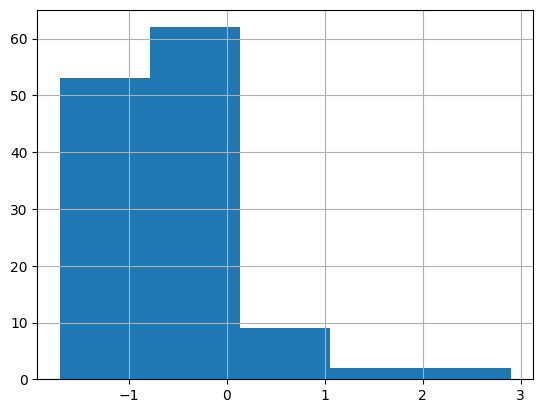

In [11]:
print((df['Mag'].min(),df['Mag'].max()))
df['Mag'].hist(bins=5)

<Axes: xlabel='Lat', ylabel='Lon'>

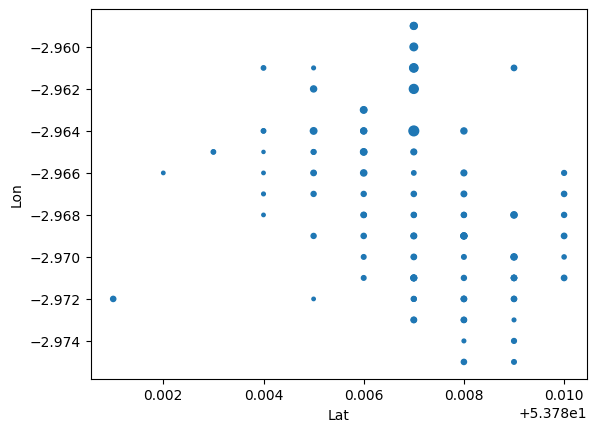

In [18]:
df['MarkerSize'] = 10*(df['Mag']+2)
df.plot.scatter('Lat','Lon',s='MarkerSize')

In [20]:
df['Comment'].unique()  # This shows that every row in our data set has comment 'HYDROFRAC EVENT'

array(['HYDROFRAC EVENT'], dtype=object)

In [24]:
df['Depth (km)'].value_counts() # Count how many events occur at each depth

Depth (km)
2    105
1     23
Name: count, dtype: int64

Plot the magnitudes by date

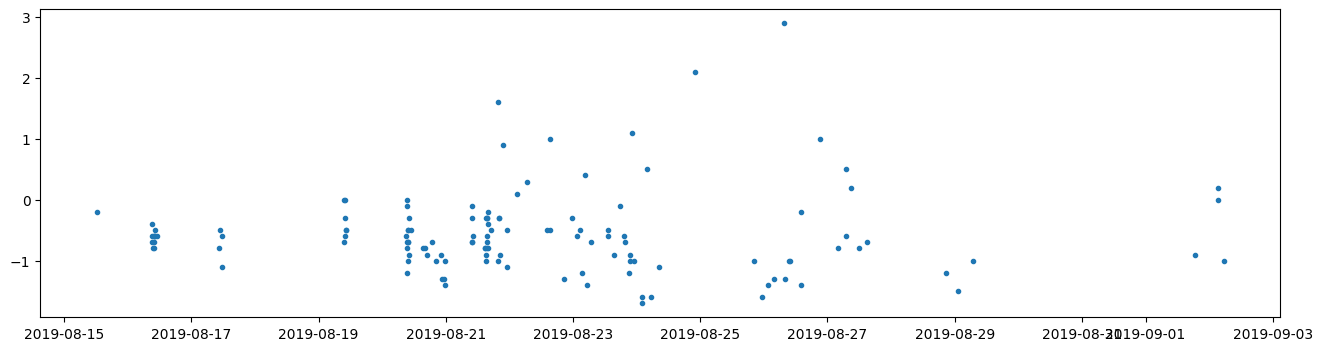

In [27]:
# Initially the date and time are just strings, which cannot be used for plotting.
# We can convert them to datetime objects using the to_datetime function in pandas.
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time (UTC)'])
fig, ax = plt.subplots(figsize=(16,4))

# Now we can use the dataetime objects to give the x coordinate and the magnitude
# column for the y coordinate.
ax.plot(df['datetime'],df['Mag'],'.')